In [1]:
#https://medium.com/coinmonks/how-to-get-images-from-imagenet-with-python-in-google-colaboratory-aeef5c1c45e5

In [1]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib


import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline

import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

import os

[nltk_data] Downloading package wordnet to /home/tyler/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
path = '/Users/tyler/Desktop/dissertation/programming/tcav/test_examples/zebra/img99.jpg'

os.path.exists(path)

False

## Get Image URLs

In [4]:
page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02391049")

soup = BeautifulSoup(page.content, 'html.parser')
str_soup = str(soup)
split_urls=str_soup.split('\r\n')

print(len(split_urls))

1475


In [3]:
#split_urls[0]

In [4]:
def url_to_image(url):

    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
    return image

In [5]:
#url = split_urls[0]
#resp = urllib.request.urlopen(url)

In [6]:
path = '/Users/tyler/Desktop/dissertation/programming/tcav/test_examples/zebra/img99.jpg'
im = cv2.imread(path)
print (type(im))

<class 'numpy.ndarray'>


(375, 500, 3)


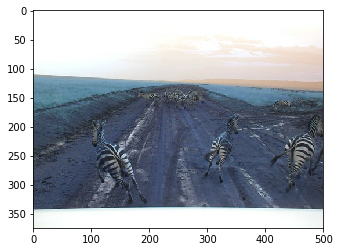

In [7]:
try:
    im = url_to_image(split_urls[6])
    h,w = im.shape[:2]
    print(im.shape)
    plt.imshow(im,cmap='gray')
    plt.show()
except:
    print('Error getting image')

In [ ]:
## Write to files
this_dir = '/Users/tyler/Desktop/dissertation/programming/tcav/concepts/zebra2'

img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)

n_of_training_images = 10000

for progress in range(n_of_training_images):

    if(progress%20==0):
        print(progress)
    if not split_urls[progress] == None:
        try:
            I = url_to_image(split_urls[progress])
            if len(I.shape) == 3:
                save_path = os.path.join(this_dir,'img' + str(progress) + '.jpg')
                #print(save_path)
                cv2.imwrite(save_path,I)
        except:
                pass
                #print('Error getting image')

In [8]:
save_path

NameError: name 'save_path' is not defined

## Dealing with labels

In [3]:
zebra = wn.synset_from_pos_and_offset('n', 2391049)
print(zebra)

Synset('zebra.n.01')


In [15]:
this_concept = wn.synsets('asian')[0]
print(this_concept)

Synset('asian.n.01')


In [16]:
this_concept.offset()

9641757

In [7]:
test = wn.synsets('stripe')
print(test)

[Synset('band.n.04'), Synset('stripe.n.02'), Synset('chevron.n.01'), Synset('stripe.n.04'), Synset('stripe.n.05'), Synset('stripe.v.01')]


In [52]:
test[0].offset()

2784732

In [19]:
#x = striped[4]

In [ ]:
x.offset()

In [ ]:
s01788445

In [59]:
num = 2784732
wnid = 'n0' + str(num)
wnid = 'n02784998'
url = 'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=' + wnid
page = requests.get(url)

soup = BeautifulSoup(page.content, 'html.parser')
str_soup = str(soup)
split_urls=str_soup.split('\r\n')

print(len(split_urls))

90


In [60]:
split_urls

['http://pic.enorth.com.cn/0/05/30/92/5309248_921942.jpg',
 'http://0717beauty.com/syssite/home/shop/1/pictures/productsimg/small/216.JPG',
 'http://i04.c.aliimg.com/img/offer/17/60/83/00/4/176083004',
 'http://www.99jewel.cn/pic/digi/JFB08121-00800351.jpg',
 'http://www.faxingw.cn/UserFiles/U318P8T1D714068F913DT20080526154356.jpg',
 'http://www.cocoshops.com/Shop/msxy/200712/20071231165348396.jpg',
 'http://0717beauty.com/syssite/home/shop/1/pictures/productsimg/small/321.JPG',
 'http://img2.bbs.163.com/fashion/ra/rainingfox/e160ca66d9c62725e74e8d36d2d92158.jpg',
 'http://www.13899.com/images/UploadFile/2007-12/11/20071211221148571.jpg',
 'http://www.gokee.cn/upimg/beauty/upimg/200803/20080301074657250.jpg',
 'http://www.kepop.com/upimg/allimg/080407/1903380.jpg',
 'http://img.article.onlylady.com/00/03/20/89/U318P8T1D692722F913DT20080416013004.jpg',
 'http://showfa.cn/upimg/allimg/071123/1942120.jpg',
 'http://www.yifahougu.cn/images/yingshi/4.jpg',
 'http://img1.mpdaogou.com/2008/5/

## From tar file

In [ ]:
import glob
import tarfile

In [ ]:
def untar(fname, targetd_dir):
    with tarfile.open(fname) as tar:
        tar.extractall(path=targetd_dir)

In [ ]:
images_dir = '/Users/tyler/Desktop/dissertation/programming/tcav/images/ILSVRC2013_DET_val.tar'
target_dir = '/Users/tyler/Desktop/dissertation/programming/tcav/images/ILSVRC2013_val_extracted'

In [ ]:
files = glob.glob(images_dir)

for f in files:
    untar(f, target_dir)